# Lab #3: Asking a statistical question

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Problem 1

In [32]:
mu = 12
std = .4
d = stats.norm.rvs(mu, std, size = 100000)
true = d
false = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
d = np.append(d, false)
np.random.shuffle(d)

### A)

#### 1.

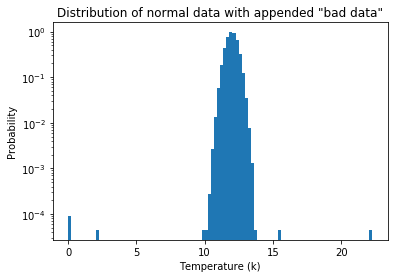

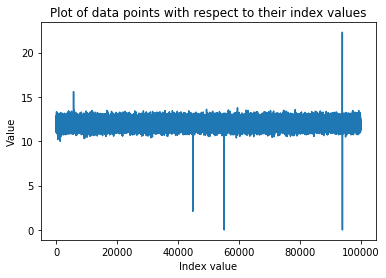

In [33]:
plt.hist(d, 100, density=True)
plt.yscale('log')
plt.xlabel('Temperature (k)')
plt.ylabel('Probability')
plt.title('Distribution of normal data with appended "bad data"')
plt.show()
x = list(range(len(d)))
plt.title('Plot of data points with respect to their index values')
plt.xlabel('Index value')
plt.ylabel('Value')
plt.plot(x, d)

Using my d array, which consists of 100,000 simulated data points assuming a Gaussian fluctuation appended with an array of "bad data", I created a histogram with a log scale y-axis in order to better observe the shape of the distribution. What I found was that you have a very normal distribution on the left side of the graph but towards the right you have random "rises" which I would attribute to the "bad data". The second graph, which is just another way in which I personally visualized this data, is all 100,008 data points graphed with respect to their index in the array. The bad data is visualized when the rather uniform locations of all of the data points spike up very high randomly which may bolster my claim that these "bad data" points are affecting my normal distribution.

#### 2.

"What recorded temperature value on the thermal device is five sigmas or more from the mean so that we can get rid of these points of data? In more detail, at which x value of temperature in the new distribution (with 'bad data') is the probability of getting the temperature larger than the probability of five sigma to the right of the mean or less than the probability of five sigma to the left of the mean in a normal distribution?" We do this by finding the integral under the distribution we analyze at x that yields the same or less probability than 5 sigma on a normal distribution. We could search for five sigma of our new dataset by searching all values larger or less than the mean +- stdev * 5 but this doesn't neccessarily give us the probability of five sigma in a normal distribution which is what we're looking for. This method only works for a normal distribution and for any other distribution it would not work. This is my question because I am essentially asking "Which data points have a probability larger or less than 5 sigma?" in order to determine which of the data points are "bad data" and thus worthy of removing. We are using 5 sigma as a base line because the probability of 5 sigma or higher is about 1 in 3.5 million which is reasonable cause to see the data point as an outlier. We also use this baseline because if we go any lower we may be recieving too many false positives and thus losing out on good data. There is discussion to be had whether its better to have more false positives but less true negative or vice versa but we decided it is better to have less false positives and more true negatives.

#### 3.

xTop: fiveSigma = 1 - Integral[from -infinity to x](function of distribution)
We want to calculate this integral and then solve for x that gives the probability of fiveSigma in a normal distribution. We do "1 - ..." to get the integral to the right of this x point.
xBot: fiveSigma = Integral[from -infinity to x](function of distribution)
We want to calculate the bottom cap of the integral and solve for x to give the low x point that gives you a probability of five sigma on a normal distribution.

13.99999999998807
10.00000000001193
100002


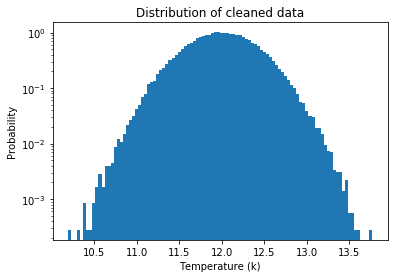

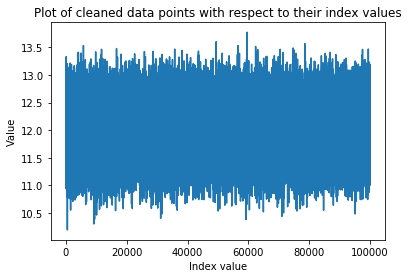

In [35]:
fiveSigma = 1 - stats.norm.cdf(5)
xTop = stats.norm.ppf(1 - fiveSigma, mu, std)
xBot = stats.norm.ppf(fiveSigma, mu, std)
print(xTop)
print(xBot)

for i in reversed(range(len(d))):
    if d[i] > xTop:
        d = np.delete(d, i)
    if d[i] < xBot:
        d = np.delete(d, i)
print(len(d))
plt.hist(d, 100, density=True)
plt.yscale('log')
plt.title('Distribution of cleaned data')
plt.xlabel('Temperature (k)')
plt.ylabel('Probability')
plt.show()
x = list(range(len(d)))
plt.title('Plot of cleaned data points with respect to their index values')
plt.xlabel('Index value')
plt.ylabel('Value')
plt.plot(x, d)

First we calculated the 5 sigma probability of a normal distribution and then we calculated the ppf, or the x value with this given probability, of a normal distribution with the adjusted mean of 12 and standard deviation of .4. I do this for both 1 - fiveSigma and just fiveSigma to get upper and lower limits. Once this was done I iterated through each value in the dataset and tested if the value was > xTop or < xBot to find all of the values less or larger than 5 sigma from the mean. Then, I removed these values and plotted the graph to get a much more normal looking distribution.

#### 4.

In [37]:
trueNeg = 0
truePos = 0
for i in range(len(true)):
    if true[i] > xTop or true[i] < xBot:
        trueNeg += 1
    else:
        truePos += 1
falseNeg = 0
falsePos = 0
for i in range(len(false)):
    if false[i] > xTop or false[i] < xBot:
        falseNeg += 1
    else:
        falsePos += 1
print('True negative: ' + str(trueNeg))
print('True positive: ' + str(truePos))
print('False negative: ' + str(falseNeg))
print('False positive: ' + str(falsePos))

True negative: 0
True positive: 100000
False negative: 6
False positive: 2


As desired in our previous discussion we were able to achieve no true negatives at the cost of 6 false negatives. True positives are values that should be left in the distribution and are left, false positives are values that should not be left in the distribution but are left, true negatives are values that should be left in the distribution but are not, and false negatives are values that should not be left in the distribution and are not left in it. Thus you will see that we kept all of the original 'good data' with 100000 true positives. Additionally we had 0 true negatives and 6 false negatives which is desirable. Unfortunately this came at the cost of 2 false positives which should have been removed but were not.

### B)

Our statistical threshold is the number of sigmas away from the mean that our cutoff of 'good data' vs 'bad data' is placed at. This affects the number of omissions greatly and deciding this cutoff is a game of deciding what number of false positives vs true negatives you are comfortable with. For example, if you want to make sure you are keeping all of your 'good data' you might wanna have a larger sigma cut off so you are including more values than not, thus making sure to keep the good values. However, this might come at the cost of creating more false positives because the sensitivity to deviation is weaker and so more 'bad data' may be left in the distribution. On the other hand, if we want to make sure you are getting rid of all of the 'bad data' you would decrease the sigma cutoff so that you can make sure more of your bad data on the edges of the distribution are caught and removed. However, this comes at the cost of removing more 'good data' as the sensitivity to deviation is much higher and so 'good data' will be mistaken for 'bad data'. Thus a general rule is that the higher the sigma, the less false positives but more true negatives and vice versa. 

To generalize the number of omissions is generally larger for a smaller sigma cutoff fo rthe reason that the cutoff is more sensitive and can mistake the 'good data' for 'bad data'.

This threshold is a predicatable quanitity; for example, if we use a 5 sigma cutoff then we find the probablity of five sigma or larger in a normal distribution. Then we find at what x value in the distribution we are analyzing yields a probability of the probability of 5 sigma on a normal distribution.

### C)

There are definitely mistakes of commission with our given sigma cutoff value. For example, 10.3K and 12.7K were left in the distribution when they should have been removed. This is because our sigma cutoff is not low/sensitive enough to detect some of these 'bad sigmas'. Thus it depends on our statistical threshold in that the higher (less sensitive) the threshold the higher the mistake of commission. This is avoidable by lowering (making more sensitive) our statistical threshold but this comes at the cost of potentially more omissions.

## Problem 2

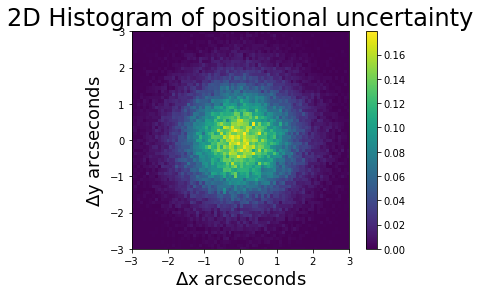

In [38]:
#a = np.concatenate(np.array(stats.norm.rvs( scale = 1, size = 100000)), np.array(stats.norm.rvs( scale = 1, size = 100000)), axis = 1)
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

### 1.

We are curious about the distance in arcseconds of a '5 sigma' detection of movement. Thus we are looking for the distance a potential asteroid must travel to be considered an asteroid. Thus, "What distance away from the origin would confirm a potential asteroid as an asteroid. Or more mathematically, in a 2D Gaussian with 1 arcsecond RMS with a significance sensitivity of 5 sigma, at what distance foes a potential asteroid reach 5 sigma away from average and is thus not considered an asteroid?

### 2.

The mathematical way in which I would approach this is to first understand that the mean is 0 (mu = 0) and rms is 1 (u = 1) and then take the equation of a Gaussian distribution: pdf(r) = (A) * e^(-(r - u)^2/(2(mu)^2)) = (A) * e^(-1/2)(r^2) = pdf(x, y) = (A) * e^(-1/2)(x^2 + y^2). One thing to note at this point is that although this function would work perfectly for a 1D Gaussian the Gaussian we are considering is a 2D Gaussian and so we must change the coordinates slightly. We are looking for 5 sigma away from the average and so since we are looking for a distance away from center we will use polar coordinates. The only change we will be making is that r^2 = x^2 + y^2 according to Pythagorean Theorem. Thus our equation is now pdf(r) = (A) * e^(-1/2)(r^2). We want to solve for this normalization constant of A so we take the integral of -infinity to infinity of the equation which should give us 1. 1 = integral[-infinity -> infinity](A * e^(-1/2)(r^2). We find that A = sqrt(2/pi). Then we know that the 5 sigma probability is equal to about 1/3.5 million and so you set an integral from -infinity to x of this pdf equation and set it equal to sigma 5. integral[-infinity -> x]((1/sqrt(2pi))(e^(-1/2)(r^2)))dr = 5 sigma on a normal distribution = 1/(3.5*10^6). The magnitude of x will be the 5 sigma x value of the 2D Gaussian. More explicitly, as we previously discussed, r = sqrt(x^2 + y^2) and so r is made up of the square root of of two sauared Gaussaian Distributions, or more formally a Chi-squared distribution with two degrees of freedom. This is synonymous with a Rayleigh distribution and so we find the 5 sigma point of this distribution.

In [39]:
fivesig = 1 - stats.norm.cdf(5)
sig5point = stats.rayleigh.ppf(1 - fivesig)
print('5 sigma in dist = ' + str(sig5point))

Thus distance required for a signal of 5 sigma is about 5.5 arcseconds

## Problem 3

An interesting aspect to this problem arises when we consider the type of probability we are measuring. We are measuring the number of cosmic rays over time and thus determining the significance of our moonshadow detection based on this observation. Because of this interesting detail about our investigation we should be making use of a Poisson Distribution because this distribution deals with the probability of a given number of events occurring within a fixed interval of time where each trial is independent of the last.

### 1.

The question at hand if "Are we confident enough to be saying that a moon is blocking cosmic rays from reaching earth if we are observing 6800 cosmic rays over 15 days? What is the probability of observing 6800 cosmic rays or less throughout the duration of 15 days? We will be making this calculation based on the distribution of expected cosmic rays observed of 1 cosmic ray per minute?"

### 2.

To express this question mathematically we want to set up the Poisson Distribution first and so we calculate the average cosmic rays measured over 15 days. 
1 (cosmic ray / minute) * (60 minutes / hour) * 8(hour / day) * 15 (days) = 7200 cosmic rays
Lambda is your average arrival rate (7200) and thus the probability we will be looking for is a sum of the Poisson pdf from 0 to 6800. P(k <= 6800) = integral[-infinity -> k]((lambda^k)(e^-lambda)/(k!)) dk. In Python we would simply do a cdf of a Poisson distribution with mu set to 7200 and k set to 6800.

In [40]:
k = 6800
mu = 7200
prob = stats.poisson.cdf(k, mu)
print("Probability of 6800 rays or less: " + str(prob))

Probability of 6800 rays or less: 1.0133280183917768e-06


### 3.

At first one might think you find the sigma value by performing a ppf on a Poisson distributionbut this is incorrect. You actually want to do it on a normal distribution so that this sigma value can represent some sort of standard for others to get a better understanding of what this sigma means. The sigma value of this probability can be found by doing a ppf on a normal distribution in Python where q = prob.

In [41]:
sig = stats.norm.ppf(prob)
print("Sigma of 6800: " + str(sig))
print("Magnitude of sigma: " + str(abs(sig)))

Sigma of 6800: -4.750747965777188
Magnitude of sigma: 4.750747965777188


The magnitude of the sigma value is about 4.75 and because it is less than 4.75 we will consider it as not a significant measurement as it is not reaching 5 sigma. It is nearly significant to claim that the moon is absorbing rays but the sigma value is just short of 5.